# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Jesús Emmanuel Flores Cortés   |
| **Fecha**      | 01/09/2025  |
| **Expediente** | 751571  |

## Regresión polinomial

Observa la siguiente gráfica.

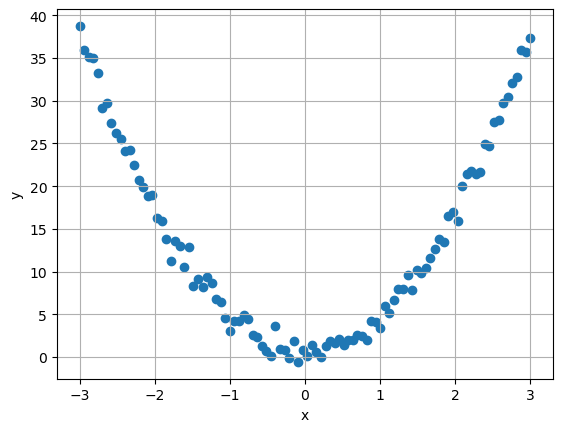

In [82]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [84]:
lm.fit(x.reshape(-1, 1), y)
lm.predict(x.reshape(-1, 1))
lm.coef_
lm.intercept_

13.30223225795873

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

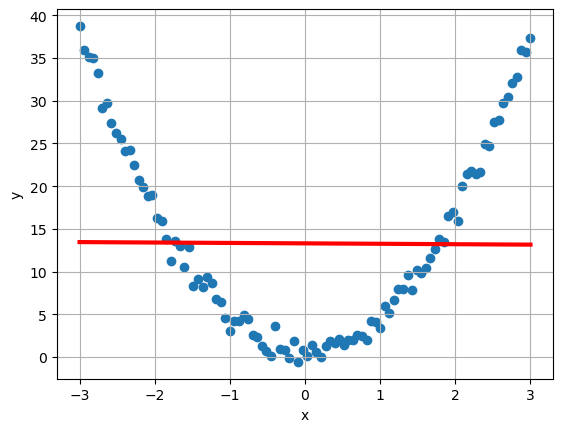

In [85]:
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()     
plt.plot(x, lm.predict(x.reshape(-1, 1)), color='red', linewidth=3)
plt.show()



Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [86]:
X_poly = np.vander(x,3)
lm = LinearRegression()
lm.fit(X_poly, y)
y_pred = lm.predict(X_poly)
print(f"Coeficiente:{lm.coef_}, Intercepto:{lm.intercept_}")


Coeficiente:[ 4.14388884 -0.04955448  0.        ], Intercepto:0.6194209631804899


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

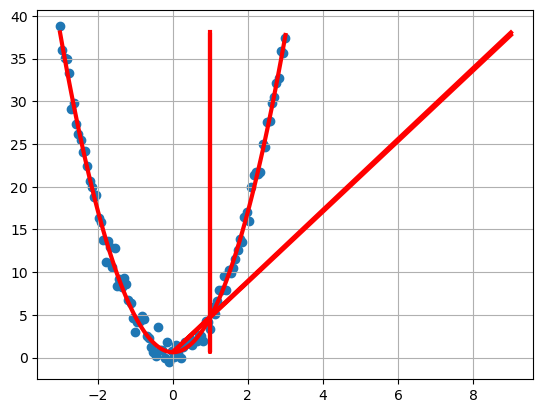

In [87]:
plt.figure()
plt.scatter(x, y)
plt.plot(X_poly, y_pred, color='red', linewidth=3)
plt.grid()  
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [88]:
orders = [3, 5, 7, 9, 11]
models = {}
r2_values = {}
for order in orders:
    X_poly = np.vander(x, order + 1)
    lm = LinearRegression()
    lm.fit(X_poly, y)
    models[order] = lm
    r2 = lm.score(X_poly, y)
    r2_values[order] = r2
    print(f"Orden: {order}, R^2: {r2:.10f}")


Orden: 3, R^2: 0.9934129585
Orden: 5, R^2: 0.9934954954
Orden: 7, R^2: 0.9935089342
Orden: 9, R^2: 0.9935141800
Orden: 11, R^2: 0.9935338704


Crea una gráfica por cada modelo con las observaciones y su curva.

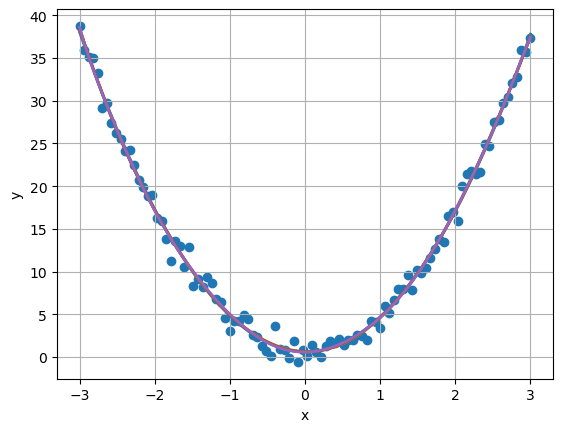

In [89]:
for order in orders:
    X_poly = np.vander(x, order + 1)
    lm = LinearRegression()
    lm.fit(X_poly, y)
    y_pred = lm.predict(X_poly)
    models[order] = (X_poly, y_pred)
    r2_values[order] = lm.score(X_poly, y)
    
plt.figure()
plt.xlabel("x") 
plt.ylabel("y")
plt.scatter(x, y) 
for order in orders:
    X_poly, y_pred = models[order]
    plt.plot(x, y_pred, linewidth=2)
plt.grid()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Pues en la grafica la curva practicamente es la misma, pero el R2 calculado demuestra que la de orden 11 es la mejor porque es el que menos varianzas sin explicar deja

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [90]:
x_new = 5
for order in [2, 3, 5, 7, 9, 11]:
    X_new = np.vander([x_new], order + 1)
    lm = LinearRegression()
    X_poly = np.vander(x, order + 1)
    lm.fit(X_poly, y)
    y_pred_new = lm.predict(X_new)
    print(f"Grado {order}: y({x_new}) = {y_pred_new[0]:.4f}")

Grado 2: y(5) = 103.9689
Grado 3: y(5) = 104.2523
Grado 5: y(5) = 84.5990
Grado 7: y(5) = 33.7432
Grado 9: y(5) = 215.7364
Grado 11: y(5) = -5265.3443


¿Cuál modelo crees que sea mejor?

Creo que vinedolo asi el que mejor quedaria seria el de grado 5 porque es el que con el valor de x = 5 parece que mejor mantiene la curva de datos 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3